![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de una bicicleta durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://github.com/justmarkham/DAT8/blob/master/data/bikeshare.csv), [dicccionario de datos](https://www.kaggle.com/c/bike-sharing-demand/data).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [3]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)
# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)
# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour
# Visualización
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables hour y workingday, escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [4]:
# Celda 1.1
bikes.groupby('workingday').total.mean()

workingday
0    188.506621
1    193.011873
Name: total, dtype: float64

Sobre la variable "workingday" se puede analizar que es una variable compuesta por dos categorías (0, 1), la cual muestra si el alquiler de la bicicleta fue un día laboral o no. Para este caso se en promedio cuando se alquilaron 188 bicicletas por hora cuando el día fue no laboral y 193 bicicletas por hora cuando el día fue laboral.

In [5]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

Sobre la variable "hour" se puede analizar que es una variable compuesta por 24 categorías (0 hasta 23), la cual muestra la hora del día en la cual ocurrió el alquiler de la bicicleta, por tanto, algo se puede inferir es que las horas donde ocurre en promedio un mayor número de alquiler de bicicletas es desde la hora 7 hasta la 20.

In [7]:
display(bikes.describe())

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,11.541613
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,6.915838
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,6.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,12.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,18.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,23.000000


Por último, en la tabla anterior se muestra un análisis descriptivo sencillo de las variables de la base de datos: 

- Por ejemplo, se puede observar que la base cuenta con 10.886 observaciones.
- La hora mínima en la base de datos en 0 horas y la máxima cuando se alquiló una bicicleta fue la hora 23, lo cual indica que se hace alquiler durante todo el día.
- Hay variables dicotómicas como "holiday" o "workingday", las cuales indican la presencia o carencia de una característica.
- Hay variables categóricas como "weather" o "season".

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica de las rentas promedio por hora cuando la variable "workingday" es igual a 0 e igual a 1, respectivamente. Analice y escriba sus hallazgos.

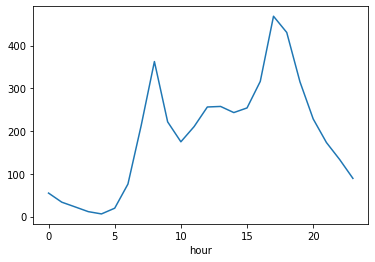

In [8]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

La grafica anterior muestra el numero promedio de bicicletas alquiladas en las distintas horas del día. Por ejemplo, durante la hora 17 y 18 del día es donde se realizan en promedio mayores alquileres de bicicleta, mientras que horas desde 2 hasta las 4 del día es donde se realizan en promedio menor número de alquiler de bicicletas.

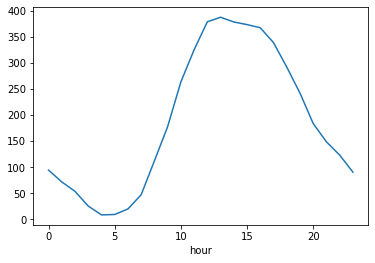

In [10]:
# Celda 2.2 - "workingday"=0 escriba su código y hallazgos 
bikes[bikes.workingday == 0].groupby('hour').total.mean().plot()

Cuando la variable "workingday" es igual a cero se puede observar que las rentas son mayores entre la hora 10 y la hora 15 del día deonde se alcanzan en promedio 400 rentas en estas horas, mientras que el número de rentas mínima se sigue manteniendo entre la hora 4 hasta la hora 6.

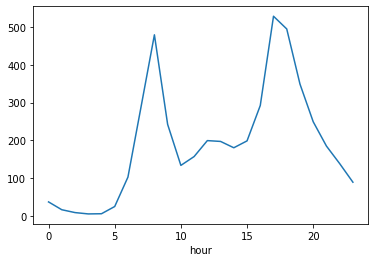

In [11]:
# Celda 2.3 - "workingday"=1 escriba su código y hallazgos 
bikes[bikes.workingday == 1].groupby('hour').total.mean().plot()

Cuando la variable "workingday" es igual a uno se puede observar que las rentas son mayores en la hora 17 y la hora 8 del día deonde se alcanzan en promedio 500 rentas en estas hora, mientras que el número de rentas mínima se sigue manteniendo entre la hora 3 hasta la hora 5. El comportamiento es muy similar al primer grafico que contemplaba la base completa.

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "hour" y "workingday" como las únicas variables predictoras. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [20]:
# Celda 3
from sklearn.model_selection import train_test_split
df = bikes.loc[:, ['total', 'hour', 'workingday']]
y = df['total'].values
x = df.drop(['total'], axis = 1).values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 17)

In [26]:
from sklearn import linear_model
# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()
 
# Entrenamos nuestro modelo
regr.fit(x_train, y_train)
 
# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(x_train)
y_pred_test = regr.predict(x_test)

In [32]:
from sklearn.metrics import mean_squared_error, r2_score
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coeficientes: \n', regr.coef_)
# Error Cuadrado Medio
print("MSE Train: %.2f" % mean_squared_error(y_train, y_pred))
print("MSE Test: %.2f" % mean_squared_error(y_test, y_pred_test))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('R Cuadrado: %.2f' % r2_score(y_train, y_pred))

Coeficientes: 
 [10.36106826  0.94887058]
MSE Train: 27367.84
MSE Test: 28083.31
R Cuadrado: 0.16


A partir de la Regresión Lineal ajustada se pueden obtener las siguientes interpretaciones, cabe aclarar que se partió la base de datos en dos (train y test) con el fin de poder comparar los diferentes modelos que se ajustaran en especial por la métrica del MSE en la base test. Ahora si se interpretan los resultados obtenidos en este punto:

- La regresión Lineal tiene un R cuadrado del 0.16 lo cual indica que se explica el 16% del porcentaje de varianza de la variable total a partir de las variables "hour" y "workingday" lo cual es muy bajo.
- El coeficiente de la variable "hour" es de 10,36 lo cual indica que por cada hora más tarde en el día que se rente una bicicleta el total aumentara en 10.36, por ejemplo si en la hora 7 de un día el promedio total es de 50 se espera que en la hora 8 el total aumente a 60,36.
- El coeficeinte de la variable "workingday" es de 0,948 lo cual indica que cuando la variable toma el valor de 1 (Día laboral) se espera que el promedio total de horas aumente en 0,948 respecto a un día con valor 0 (Día no laboral).
- Por último, se puede deducir que este modelo no es tan apropiado con las variables usadas, especialmente la variable hour la cual se observó al hacer el análisis grafico que presenta los valores más altos en horas intermedias, por tal motivo se puede esperar que un modelo como un árbol de regresión capture mejor este comportamiento debido a la facilidad de los cortes.

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "workingday". El árbol debe tener al menos 6 nodos finales.

In [ ]:
# Celda 4


### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "hour" y "workingday" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

In [61]:
# Celda 5

# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 21)

# Lista para guardar los valores del MSE para cada valor de máxima profundidad (max_depth)
mse_scores = []

# Importación de modelos de sklearn 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clf = DecisionTreeClassifier(max_depth = depth, random_state = 1)
    mse_scores.append(cross_val_score(clf, x_train, y_train, cv = 10, scoring = 'r2').mean())

Text(0, 0.5, 'MSE')

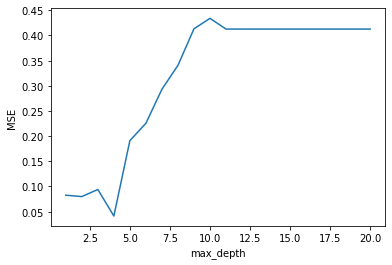

In [62]:
# Gráfica max_depth versus RMSE (error del modelo)
plt.plot(max_depth_range, mse_scores)
plt.xlabel('max_depth')
plt.ylabel('MSE')

In [57]:
# Mejor accuracy (desempeño del modelo) y su correspondiente max_depth
sorted(zip(mse_scores, max_depth_range))[::-1][0]

(0.4338763797625099, 10)

In [58]:
# max_depth = 4 fue el mejor, se ajusta un árbol usando este valor 
clf = DecisionTreeClassifier(max_depth = 10, random_state = 1)
clf.fit(x_train, y_train)

# Hacemos las predicciones
y_pred = clf.predict(x_train)
y_pred_test = clf.predict(x_test)

In [59]:
from sklearn.metrics import mean_squared_error, r2_score
# Error Cuadrado Medio
print("MSE Train: %.2f" % mean_squared_error(y_train, y_pred))
print("MSE Test: %.2f" % mean_squared_error(y_test, y_pred_test))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('R Cuadrado: %.2f' % r2_score(y_train, y_pred))

MSE Train: 20092.22
MSE Test: 20967.85
R Cuadrado: 0.38


Al construir el árbol de decisión se calibra el parámetro de máxima profundidad donde se evalúa usando la métrica del r2(varianza explicada), al realizar esta calibración se obtiene el mejor resultado con un árbol de profundidad 10. Luego se ajusta el árbol de decisión y por último se evalúa en la muestra test con la métrica del MSE, donde se obtiene un valor de 20.967 que es mucho menor al obtenido en la regresión lineal (28.083), por tanto, el árbol de decisión presenta mejores resultados a los obtenidos en la regresión lineal, tanto en el MSE de prueba, como en el MSE train y en el R2 del modelo. En conclusión, este modelo es más adecuado que la regresión lineal múltiple para estos datos.

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la populridad esta dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el sigueinte enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [63]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [65]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [66]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [81]:
# Celda 6

# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 21)

# Lista para guardar los valores del MSE para cada valor de máxima profundidad (max_depth)
accuracy_scores = []

# Importación de modelos de sklearn 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clf = DecisionTreeClassifier(max_depth = depth, random_state = 1)
    accuracy_scores.append(cross_val_score(clf, X_train, y_train, cv=10, scoring = 'accuracy').mean())

Text(0, 0.5, 'Accuracy')

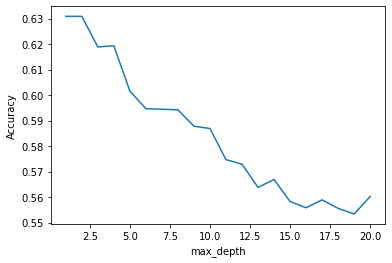

In [82]:
# Gráfica max_depth versus RMSE (error del modelo)
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

In [83]:
# Mejor accuracy (desempeño del modelo) y su correspondiente max_depth
sorted(zip(accuracy_scores, max_depth_range))[::-1][0]

(0.6308888888888888, 2)

In [84]:
# max_depth=4 fue el mejor, se ajusta un árbol usando este valor 
clf = DecisionTreeClassifier(max_depth = 2, random_state=1)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=1)

In [91]:
from sklearn import metrics
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Arbol Decisión: %.4f" % metrics.accuracy_score(y_pred, y_test))
print("F1 score Arbol Decisión: %.4f" % metrics.f1_score(y_pred, y_test))

Accuracy Arbol Decisión: 0.6453
F1 score Arbol Decisión: 0.6449


In [98]:
from sklearn.linear_model import LogisticRegression
clfRegLog = LogisticRegression(random_state = 0, max_iter = 10000)
clfRegLog.fit(X_train,y_train)
y_pred = clfRegLog.predict(X_test)
print("Accuracy Regresión Logística: %.4f" % metrics.accuracy_score(y_pred, y_test))
print("F1 score Regresión Logística: %.4f" % metrics.f1_score(y_pred, y_test))

Accuracy Regresión Logística: 0.6160
F1 score Regresión Logística: 0.6028


En este ejercicio se ajustaron dos modelos:

- El primero fue un árbol de clasificación en el cual se calibro el parámetro de profundidad usando la base train y la métrica accuracy. Donde se obtuvo que el mejor árbol es de profundidad 2. Posteriormente se ajustó el modelo y se calculó con la muestra test las métricas de accuracy (0.6453) y F1 Score (0.6449), se puede observar que no se obtienen resultados muy buenos para este modelo.

- El segundo modelo ajustado fue una Regresión Logística con 10.000 iteraciones, los resultados obtenidos en este modelo fueron accuracy (0.6160) y F1 Score (0.6028), los cuales no son tan buenos. Al analizar estos dos modelos presentan problemas para predecir si una noticia es popular o no.

### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth = None\
-100 árboles de decisión donde max_depth = 2\
-100 regresiones logísticas

Evalúe los modelos utilizando las métricas de Accuracy y F1-Score.

In [101]:
# Celda 7
# Definición del modelo BaggingClassifier de la libreria sklearn
from sklearn.ensemble import BaggingClassifier
clf1 = BaggingClassifier(base_estimator = DecisionTreeClassifier(max_depth = None), n_estimators = 100, bootstrap = True, 
                         max_samples = 300, random_state = 17, n_jobs = -1, oob_score = True)
# Predicción y desempeño al hacer votación mayoritaria
clf1.fit(X_train, y_train)
y_pred = clf1.predict(X_test)
print("Accuracy Arbol Decisión párametro max_depth(None): %.4f" % metrics.accuracy_score(y_pred, y_test))
print("F1 score Arbol Decisión párametro max_depth(None): %.4f" % metrics.f1_score(y_pred, y_test))

Accuracy Arbol Decisión párametro max_depth(None): 0.6513
F1 score Arbol Decisión párametro max_depth(None): 0.6579


In [102]:
# Definición del modelo BaggingClassifier de la libreria sklearn
clf2 = BaggingClassifier(base_estimator = DecisionTreeClassifier(max_depth = 2), n_estimators = 100, bootstrap = True, 
                         max_samples = 300, random_state = 17, n_jobs = -1, oob_score = True)
# Predicción y desempeño al hacer votación mayoritaria
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)
print("Accuracy Arbol Decisión párametro max_depth(2): %.4f" % metrics.accuracy_score(y_pred, y_test))
print("F1 score Arbol Decisión párametro max_depth(2): %.4f" % metrics.f1_score(y_pred, y_test))

Accuracy Arbol Decisión párametro max_depth(2): 0.6487
F1 score Arbol Decisión párametro max_depth(2): 0.6388


In [104]:
# Definición del modelo BaggingClassifier de la libreria sklearn
clf3 = BaggingClassifier(base_estimator = LogisticRegression(), n_estimators = 100, bootstrap = True, 
                         max_samples = 300, random_state = 17, n_jobs = -1, oob_score = True)
# Predicción y desempeño al hacer votación mayoritaria
clf3.fit(X_train, y_train)
y_pred = clf3.predict(X_test)
print("Accuracy Regresión Logística VM: %.4f" % metrics.accuracy_score(y_pred, y_test))
print("F1 score Regresión Logística VM: %.4f" % metrics.f1_score(y_pred, y_test))

Accuracy Regresión Logística VM: 0.6227
F1 score Regresión Logística VM: 0.6181


Se ajustan los 3 modelos mediante la metodología Bagging con Votación Mayoritaria donde se obtienen los siguientes resultados:

-El modelo Baggin usando Árbol de Clasificación y parámetro de profundidad None obtuvo un Accuracy (0.6513) y F1 Score (0.6579).
-El modelo Baggin usando Árbol de Clasificación y parámetro de profundidad 2 obtuvo un Accuracy (0.6487) y F1 Score (0.6388).
-El modelo Baggin usando Regresión Logística obtuvo un Accuracy (0.6227) y F1 Score (0.6181).

Todos los modelos mejoraron al usar la metodología de ensamblaje por votación mayoritaria, esto se puede deber a que se minimiza la varianza que se obtenía al usar un solo modelo y mejoran las predicciones. Hasta el momento el mejor modelo es el árbol de decisión con parámetro None usando bagging.

### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [111]:
# Celda 8
# Definición del modelo BaggingClassifier de la libreria sklearn
clf1 = BaggingClassifier(base_estimator = DecisionTreeClassifier(max_depth = None), n_estimators = 100, bootstrap = True, 
                         max_samples = 300, random_state = 17, n_jobs = -1, oob_score = True)

# Predicción y desempeño al hacer votación mayoritaria
clf1.fit(X_train, y_train)
y_pred = clf1.predict(X_test)

# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
errors = np.zeros(clf1.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], clf1.n_estimators))

for i in range(clf1.n_estimators):
    oob_sample = ~clf1.estimators_samples_[i]
    y_pred_ = clf1.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = clf1.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)

print("Accuracy Arbol Decisión párametro max_depth(None): %.4f" % metrics.accuracy_score(y_pred, y_test))
print("F1 score Arbol Decisión párametro max_depth(None): %.4f" % metrics.f1_score(y_pred, y_test))

Accuracy Arbol Decisión párametro max_depth(None): 0.6567
F1 score Arbol Decisión párametro max_depth(None): 0.6692


In [112]:
# Definición del modelo BaggingClassifier de la libreria sklearn
clf2 = BaggingClassifier(base_estimator = DecisionTreeClassifier(max_depth = 2), n_estimators = 100, bootstrap = True, 
                         max_samples = 300, random_state = 17, n_jobs = -1, oob_score = True)

# Predicción y desempeño al hacer votación mayoritaria
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)

# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
errors = np.zeros(clf2.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], clf2.n_estimators))

for i in range(clf2.n_estimators):
    oob_sample = ~clf2.estimators_samples_[i]
    y_pred_ = clf2.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = clf2.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)

print("Accuracy Arbol Decisión párametro max_depth(2): %.4f" % metrics.accuracy_score(y_pred, y_test))
print("F1 score Arbol Decisión párametro max_depth(2): %.4f" % metrics.f1_score(y_pred, y_test))

Accuracy Arbol Decisión párametro max_depth(2): 0.6487
F1 score Arbol Decisión párametro max_depth(2): 0.6388


In [113]:
# Definición del modelo BaggingClassifier de la libreria sklearn
clf3 = BaggingClassifier(base_estimator = LogisticRegression(), n_estimators = 100, bootstrap = True, 
                         max_samples = 300, random_state = 17, n_jobs = -1, oob_score = True)

# Predicción y desempeño al hacer votación mayoritaria
clf3.fit(X_train, y_train)
y_pred = clf3.predict(X_test)

# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
errors = np.zeros(clf3.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], clf3.n_estimators))

for i in range(clf3.n_estimators):
    oob_sample = ~clf3.estimators_samples_[i]
    y_pred_ = clf3.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = clf3.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)

print("Accuracy Regresión Logística VP: %.4f" % metrics.accuracy_score(y_pred, y_test))
print("F1 score Regresión Logística VP: %.4f" % metrics.f1_score(y_pred, y_test))

Accuracy Regresión Logística VP: 0.6173
F1 score Regresión Logística VP: 0.6095


Se ajustan los 3 modelos mediante la metodología Bagging con Votación Ponderada donde se obtienen los siguientes resultados:

-El modelo Baggin usando Árbol de Clasificación y parámetro de profundidad None obtuvo un Accuracy (0.6567) y F1 Score (0.6592).
-El modelo Baggin usando Árbol de Clasificación y parámetro de profundidad 2 obtuvo un Accuracy (0.6487) y F1 Score (0.6388).
-El modelo Baggin usando Regresión Logística obtuvo un Accuracy (0.6173) y F1 Score (0.6095).

Todos los modelos mejoraron al usar la metodología de ensamblaje por votación ponderada respecto a los hechos en el punto 6, esto se puede deber a que se minimiza la varianza que se obtenía al usar un solo modelo y mejoran las predicciones. 

### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

Al ajustar diversos modelos mediante arboles de decisión y regresión logística, mediante la metodología de bagging con votación mayoritaria y votación ponderada se puede concluir:

- Los modelos mejoran al usar metodologías de ensamblaje sin importar si es votación mayoritaria o votación ponderada.
- El mejor modelo que se obtuvo mediante las dos metodologías de ensamblaje (votación ponderada, votación mayoritaria) fue el árbol de decisión con parámetro de profundidad none, el cual mejoraba al reducir su varianza debido a las distintas iteraciones.
- Los modelos de árboles de decisión tienen mejor desempeño al usar votación ponderada, esto se puede deber a que tienen mejores métricas del error OOB y al darle mayor importancia a los modelos con menor error se presentan mejores predicciones.
- Las modelos de regresión logística no obtuvieron buenos resultados, esto puede deberse a datos atípicos o que al no realizar una metodología de selección de variables se están viendo afectados por sesgos, caso contrario de los árboles de decisión que no se ven afectados por datos atípicos y que al escoger las mejores particiones de variables no se afectan demasiado por tener muchas variables en el modelo (además de poder ajustar esto con el parámetro de profundidad y selecciones mejores variables).
- Por último, se puede deducir que el mejor modelo es el árbol de decisión con parámetro de profundidad none y usando la metodología de ensamblaje bagging por votación pondera el cual obtuvo el mejor accuracy (0.6567) y el mejor F1 Score (0.6592)